In [47]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [67]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

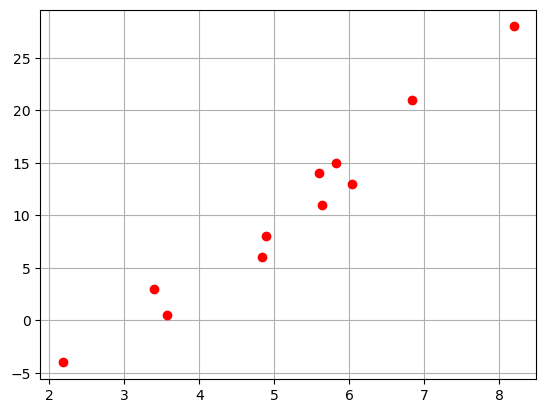

In [33]:
plt.plot(t_un, t_c, 'ro')
plt.grid(True)

# Fitting Linear Model (manually)

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [5]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [11]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [13]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [25]:
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.927647
Epoch 1000, Loss 2.927647
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927645
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927645
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927645
Epoch 4500, Loss 2.927645
Epoch 5000, Loss 2.927645


tensor([  5.3676, -17.3042], requires_grad=True)

# Using NN

In [129]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [131]:
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = 0.1*torch.tensor(t_u).unsqueeze(1) # this scaling is really important as otherwise the optimizer does not converge!!

In [133]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [135]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u)
        loss_train = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")

In [137]:
training_loop(n_epochs = 3000, optimizer = optimizer, model = linear_model, loss_fn = nn.MSELoss(), t_u = t_u, t_c = t_c)

Epoch 1, Training loss 159.0102
Epoch 1000, Training loss 3.8055
Epoch 2000, Training loss 2.9569
Epoch 3000, Training loss 2.9286


In [141]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[5.3491]], requires_grad=True),
 Parameter containing:
 tensor([-17.1993], requires_grad=True)]

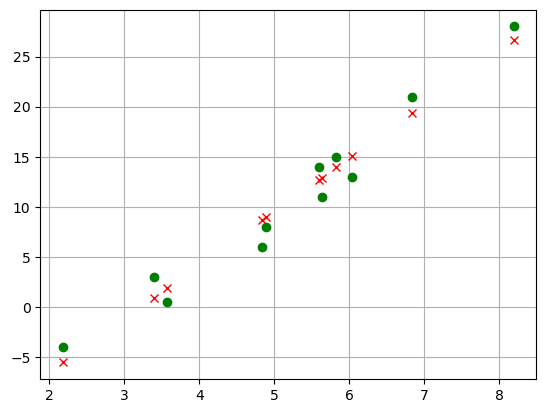

In [153]:
plt.plot(t_u, linear_model(t_u).detach().numpy(), 'rx')
plt.plot(t_u, t_c, 'go')
plt.grid()